Ridge regression

This Ridge Regression project is based on the previous simple model of logistic regression.

necessary imports

In [1]:
#!pip install pandas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np


Import and display df

In [9]:
import tkinter as tk
from tkinter import filedialog

# No full GUI, keep the root window from appearing
root = tk.Tk()
root.withdraw()

# Open file dialog to choose the dataset file
file_path = filedialog.askopenfilename()
if not file_path:
    print("No file selected. Exiting...")
    exit()

# Data Loading
print("Loading data from file...")
df = pd.read_csv(file_path)


# Check if a file was selected
if file_path:  # If a file was selected
    print(f"Loading data from {file_path}")
    df = pd.read_csv(file_path)  # Load the selected CSV into a pandas DataFrame
    print(df.head())  # Display the first few rows of the DataFrame
else:
    print("No file selected.")

Loading data from file...
Loading data from C:/Users/wjbea/Downloads/20240213 ML project credit card defaults/archive/UCI_Credit_Card.csv
   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    1

data preparation and partitioning

In [10]:
# Splitting data into features and target
X = df.drop(columns=['default.payment.next.month'])  # Features
y = df['default.payment.next.month']  # Target variable

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


Training on simple ridge model

In [14]:
# Initialize the Ridge Regression model
ridge_model = Ridge(alpha=1.0)

# Fit the Ridge model on the training data
ridge_model.fit(X_train, y_train)

# Predict on the test data using Ridge Regression
y_pred_ridge = ridge_model.predict(X_test)

# Convert predicted values to binary predictions for Ridge Regression
y_pred_ridge_binary = np.where(y_pred_ridge >= 0.5, 1, 0)

# Calculate classification metrics for Ridge Regression
mse_ridge = mean_squared_error(y_test, y_pred_ridge_binary)
r2_ridge = r2_score(y_test, y_pred_ridge_binary)
accuracy_ridge = accuracy_score(y_test, y_pred_ridge_binary)
precision_ridge = precision_score(y_test, y_pred_ridge_binary)
recall_ridge = recall_score(y_test, y_pred_ridge_binary)
f1_ridge = f1_score(y_test, y_pred_ridge_binary)
roc_auc_ridge = roc_auc_score(y_test, y_pred_ridge)

Training on logistic ridge model

In [15]:
# Initialize the Logistic Regression model with ridge regularization
logistic_ridge_model = LogisticRegression(penalty='l2', C=1.0)

# Fit the Logistic Ridge model on the training data
logistic_ridge_model.fit(X_train, y_train)

# Predict on the test data using Logistic Ridge Regression
y_pred_logistic_ridge = logistic_ridge_model.predict(X_test)

# Calculate classification metrics for Logistic Ridge Regression
mse_logistic_ridge = mean_squared_error(y_test, y_pred_logistic_ridge)
r2_logistic_ridge = r2_score(y_test, y_pred_logistic_ridge)
accuracy_logistic_ridge = accuracy_score(y_test, y_pred_logistic_ridge)
precision_logistic_ridge = precision_score(y_test, y_pred_logistic_ridge)
recall_logistic_ridge = recall_score(y_test, y_pred_logistic_ridge)
f1_logistic_ridge = f1_score(y_test, y_pred_logistic_ridge)
roc_auc_logistic_ridge = roc_auc_score(y_test, logistic_ridge_model.predict_proba(X_test)[:, 1])


comparison of the two models

In [16]:
# Print metrics for both models
print("Ridge Regression Metrics:")
print(f'Mean Squared Error: {mse_ridge}')
print(f'R^2 Score: {r2_ridge}')
print(f'Accuracy: {accuracy_ridge}')
print(f'Precision: {precision_ridge}')
print(f'Recall: {recall_ridge}')
print(f'F1 Score: {f1_ridge}')
print(f'ROC AUC: {roc_auc_ridge}')
print("\n")

print("Logistic Ridge Regression Metrics:")
print(f'Mean Squared Error: {mse_logistic_ridge}')
print(f'R^2 Score: {r2_logistic_ridge}')
print(f'Accuracy: {accuracy_logistic_ridge}')
print(f'Precision: {precision_logistic_ridge}')
print(f'Recall: {recall_logistic_ridge}')
print(f'F1 Score: {f1_logistic_ridge}')
print(f'ROC AUC: {roc_auc_logistic_ridge}')

Ridge Regression Metrics:
Mean Squared Error: 0.20044444444444445
R^2 Score: -0.17665816326530615
Accuracy: 0.7995555555555556
Precision: 0.6893203883495146
Recall: 0.14489795918367346
F1 Score: 0.23946037099494097
ROC AUC: 0.7170384247448979


Logistic Ridge Regression Metrics:
Mean Squared Error: 0.191
R^2 Score: -0.12121695269016697
Accuracy: 0.809
Precision: 0.680119581464873
Recall: 0.23214285714285715
F1 Score: 0.3461392164321035
ROC AUC: 0.7230513682745825


Visual comaprison

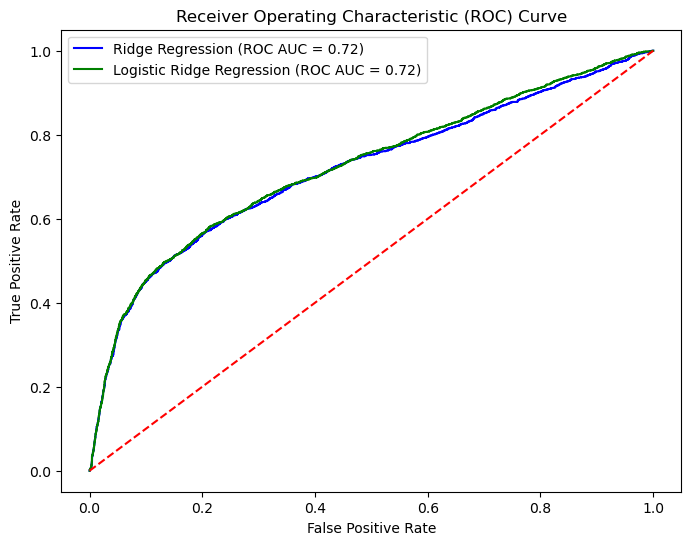

In [17]:
from sklearn.metrics import roc_curve

# Compute ROC curve for Ridge Regression
fpr_ridge, tpr_ridge, _ = roc_curve(y_test, y_pred_ridge)

# Compute ROC curve for Logistic Ridge Regression
fpr_logistic_ridge, tpr_logistic_ridge, _ = roc_curve(y_test, logistic_ridge_model.predict_proba(X_test)[:, 1])

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_ridge, tpr_ridge, color='blue', label='Ridge Regression (ROC AUC = {:.2f})'.format(roc_auc_ridge))
plt.plot(fpr_logistic_ridge, tpr_logistic_ridge, color='green', label='Logistic Ridge Regression (ROC AUC = {:.2f})'.format(roc_auc_logistic_ridge))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


for each model, sample train and test data each 5 times, 50 cases, calculate and compare accuracy results.

In [18]:
from sklearn.model_selection import StratifiedKFold

# Initialize lists to store accuracy results
ridge_accuracies = []
logistic_ridge_accuracies = []

# Repeatedly sample train and test data and calculate accuracy for Ridge Regression
for _ in range(5):  # Repeat 5 times
    # Split the data into train and test sets using stratified k-fold
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=None)
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Standardize the features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        # Initialize the Ridge Regression model
        ridge_model = Ridge(alpha=1.0)
        
        # Fit the Ridge model on the training data
        ridge_model.fit(X_train_scaled, y_train)
        
        # Predict on the test data using Ridge Regression
        y_pred_ridge = ridge_model.predict(X_test_scaled)
        
        # Calculate accuracy for Ridge Regression
        accuracy_ridge = accuracy_score(y_test, np.round(y_pred_ridge))
        ridge_accuracies.append(accuracy_ridge)

# Repeatedly sample train and test data and calculate accuracy for Logistic Ridge Regression
for _ in range(5):  # Repeat 5 times
    # Split the data into train and test sets using stratified k-fold
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=None)
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Standardize the features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        # Initialize the Logistic Ridge Regression model
        logistic_ridge_model = LogisticRegression(penalty='l2', C=1.0)
        
        # Fit the Logistic Ridge model on the training data
        logistic_ridge_model.fit(X_train_scaled, y_train)
        
        # Predict on the test data using Logistic Ridge Regression
        y_pred_logistic_ridge = logistic_ridge_model.predict(X_test_scaled)
        
        # Calculate accuracy for Logistic Ridge Regression
        accuracy_logistic_ridge = accuracy_score(y_test, y_pred_logistic_ridge)
        logistic_ridge_accuracies.append(accuracy_logistic_ridge)

# Print average accuracy results
print("Ridge Regression Average Accuracy:", sum(ridge_accuracies) / len(ridge_accuracies))
print("Logistic Ridge Regression Average Accuracy:", sum(logistic_ridge_accuracies) / len(logistic_ridge_accuracies))


Ridge Regression Average Accuracy: 0.7990466666666667
Logistic Ridge Regression Average Accuracy: 0.8103800000000001


Plot accuracy comparison for each sample

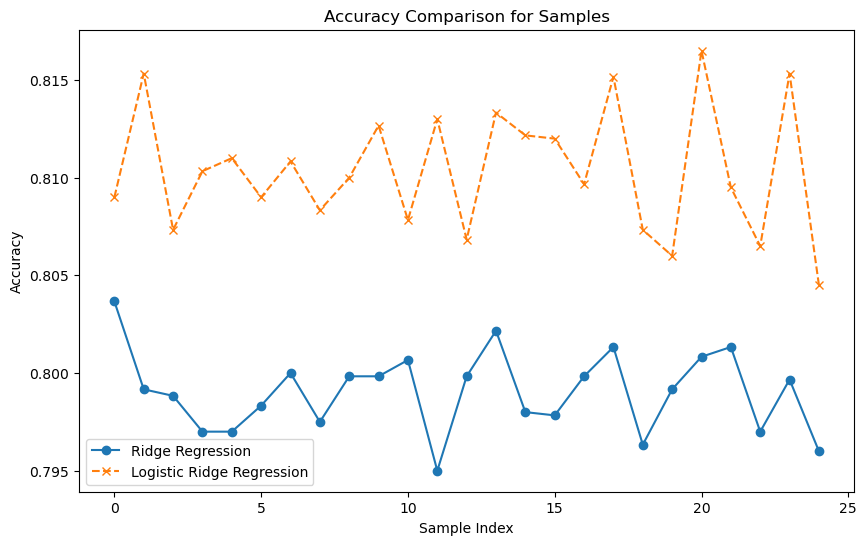

In [20]:
# Plot accuracy comparison for each sample
plt.figure(figsize=(10, 6))
plt.plot(range(len(ridge_accuracies)), ridge_accuracies, label='Ridge Regression', marker='o', linestyle='-')
plt.plot(range(len(logistic_ridge_accuracies)), logistic_ridge_accuracies, label='Logistic Ridge Regression', marker='x', linestyle='--')
plt.xlabel('Sample Index')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison for Samples')
plt.legend()
plt.show()

# Clear lists for next iteration
ridge_accuracies.clear()
logistic_ridge_accuracies.clear()

Model Summaries 

In [21]:
import statsmodels.api as sm

# Fit Ridge Regression model
ridge_model = sm.OLS(y_train, X_train).fit()

# Print summary
print("Ridge Regression Model Summary:")
print(ridge_model.summary())

# Fit Logistic Ridge Regression model
logistic_ridge_model = sm.Logit(y_train, X_train).fit()

# Print summary
print("\nLogistic Ridge Regression Model Summary:")
print(logistic_ridge_model.summary())




Ridge Regression Model Summary:
                                     OLS Regression Results                                    
Dep. Variable:     default.payment.next.month   R-squared (uncentered):                   0.316
Model:                                    OLS   Adj. R-squared (uncentered):              0.315
Method:                         Least Squares   F-statistic:                              460.5
Date:                        Sun, 03 Mar 2024   Prob (F-statistic):                        0.00
Time:                                23:35:14   Log-Likelihood:                         -11402.
No. Observations:                       24000   AIC:                                  2.285e+04
Df Residuals:                           23976   BIC:                                  2.305e+04
Df Model:                                  24                                                  
Covariance Type:                    nonrobust                                                  
        

Improve on finding best model

In [22]:
from sklearn.model_selection import GridSearchCV

# Define a range of penalty values
penalty_values = [0.001, 0.01, 0.1, 1, 10]  # Trial values

# Define parameter grid
param_grid = {'C': penalty_values}  # C is the inverse of regularization strength

# Initialize Logistic Regression model
logistic_regression = LogisticRegression(penalty='l2', solver='liblinear')

# Initialize GridSearchCV
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='accuracy')

# Perform grid search
grid_search.fit(X_train, y_train)

# Get best parameter
best_penalty = grid_search.best_params_['C']

# Get best model
best_model = grid_search.best_estimator_

# Print best penalty value
print("Best Penalty Value:", best_penalty)

# Print best model
print("\nBest Model:")
print(best_model)


Best Penalty Value: 0.001

Best Model:
LogisticRegression(C=0.001, solver='liblinear')


cross-validated accuracy plot

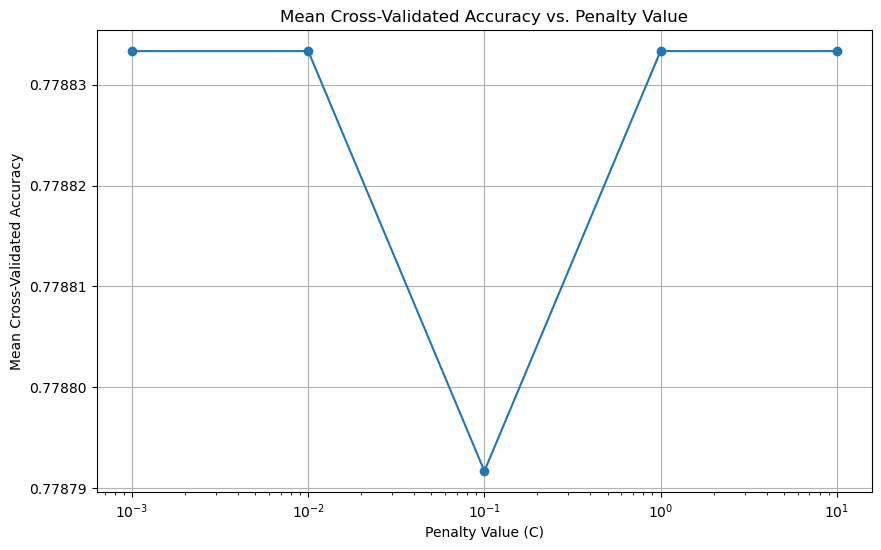

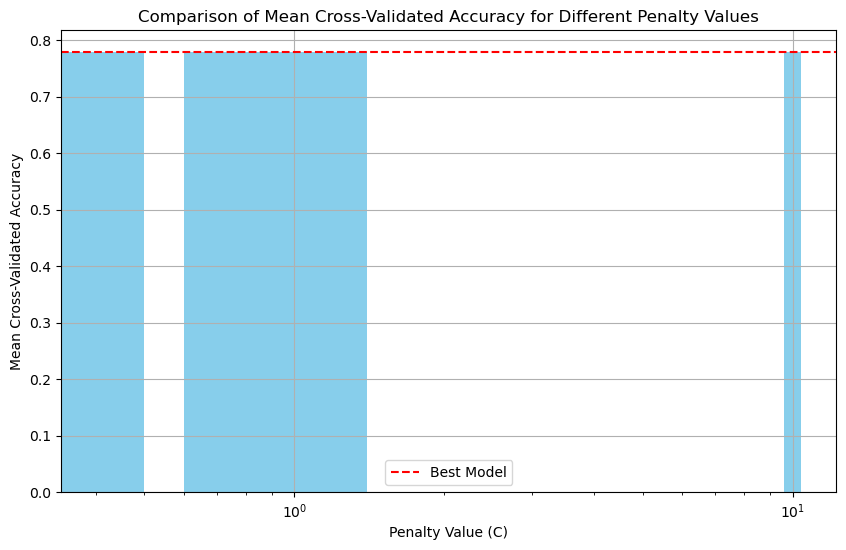

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Get mean cross-validated accuracy for each penalty value
mean_scores = grid_search.cv_results_['mean_test_score']

# Plot mean cross-validated accuracy for each penalty value
plt.figure(figsize=(10, 6))
plt.plot(penalty_values, mean_scores, marker='o')
plt.xlabel('Penalty Value (C)')
plt.ylabel('Mean Cross-Validated Accuracy')
plt.title('Mean Cross-Validated Accuracy vs. Penalty Value')
plt.xscale('log')  # Use logarithmic scale for penalty values
plt.grid(True)
plt.show()

# Compare the performance of the best model with other models
model_comparison = {'Penalty Value': penalty_values, 'Mean Accuracy': mean_scores}
model_comparison_df = pd.DataFrame(model_comparison)

plt.figure(figsize=(10, 6))
plt.bar(model_comparison_df['Penalty Value'], model_comparison_df['Mean Accuracy'], color='skyblue')
plt.axhline(y=model_comparison_df['Mean Accuracy'].max(), color='red', linestyle='--', label='Best Model')
plt.xlabel('Penalty Value (C)')
plt.ylabel('Mean Cross-Validated Accuracy')
plt.title('Comparison of Mean Cross-Validated Accuracy for Different Penalty Values')
plt.xscale('log')  # Use logarithmic scale for penalty values
plt.legend()
plt.grid(True)
plt.show()


Model metrics

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initialize lists to store metric values for each model
accuracy_values = []
precision_values = []
recall_values = []
f1_values = []
roc_auc_values = []

# Calculate metrics for each model
for penalty in penalty_values:
    # Initialize Logistic Regression model with current penalty value
    logistic_regression = LogisticRegression(penalty='l2', C=penalty, solver='liblinear')
    
    # Fit the model on the training data
    logistic_regression.fit(X_train, y_train)
    
    # Predict on the test data
    y_pred = logistic_regression.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    # Append metric values to lists
    accuracy_values.append(accuracy)
    precision_values.append(precision)
    recall_values.append(recall)
    f1_values.append(f1)
    roc_auc_values.append(roc_auc)

# Print metric values for each model
print("Penalty Value\tAccuracy\tPrecision\tRecall\t\tF1 Score\tROC AUC")
for i, penalty in enumerate(penalty_values):
    print(f"{penalty}\t\t{accuracy_values[i]:.4f}\t\t{precision_values[i]:.4f}\t\t{recall_values[i]:.4f}\t\t{f1_values[i]:.4f}\t\t{roc_auc_values[i]:.4f}")


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision 

Penalty Value	Accuracy	Precision	Recall		F1 Score	ROC AUC
0.001		0.7788		0.0000		0.0000		0.0000		0.5000
0.01		0.7788		0.0000		0.0000		0.0000		0.5000
0.1		0.7788		0.0000		0.0000		0.0000		0.5000
1		0.7788		0.0000		0.0000		0.0000		0.5000
10		0.7788		0.0000		0.0000		0.0000		0.5000


Resampling to check if there is error

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision 


Sample 1 Metrics:
Penalty Value	Accuracy	Precision	Recall		F1 Score	ROC AUC
0.001		0.7617		0.0000		0.0000		0.0000		0.4989
0.01		0.7617		0.0000		0.0000		0.0000		0.4989
0.1		0.7617		0.0000		0.0000		0.0000		0.4989
1		0.7617		0.0000		0.0000		0.0000		0.4989
10		0.7617		0.0000		0.0000		0.0000		0.4989
100		0.7617		0.0000		0.0000		0.0000		0.4989
1000		0.7617		0.0000		0.0000		0.0000		0.4989
10000		0.7617		0.0000		0.0000		0.0000		0.4989

Sample 2 Metrics:
Penalty Value	Accuracy	Precision	Recall		F1 Score	ROC AUC
0.001		0.7983		0.0000		0.0000		0.0000		0.5000
0.01		0.7983		0.0000		0.0000		0.0000		0.5000
0.1		0.7983		0.0000		0.0000		0.0000		0.5000
1		0.7983		0.0000		0.0000		0.0000		0.5000
10		0.7983		0.0000		0.0000		0.0000		0.5000
100		0.7983		0.0000		0.0000		0.0000		0.5000
1000		0.7983		0.0000		0.0000		0.0000		0.5000
10000		0.7983		0.0000		0.0000		0.0000		0.5000

Sample 3 Metrics:
Penalty Value	Accuracy	Precision	Recall		F1 Score	ROC AUC
0.001		0.7758		1.0000		0.0147		0.0289		0.5073
0.01		0.7725	

IndexError: list index out of range

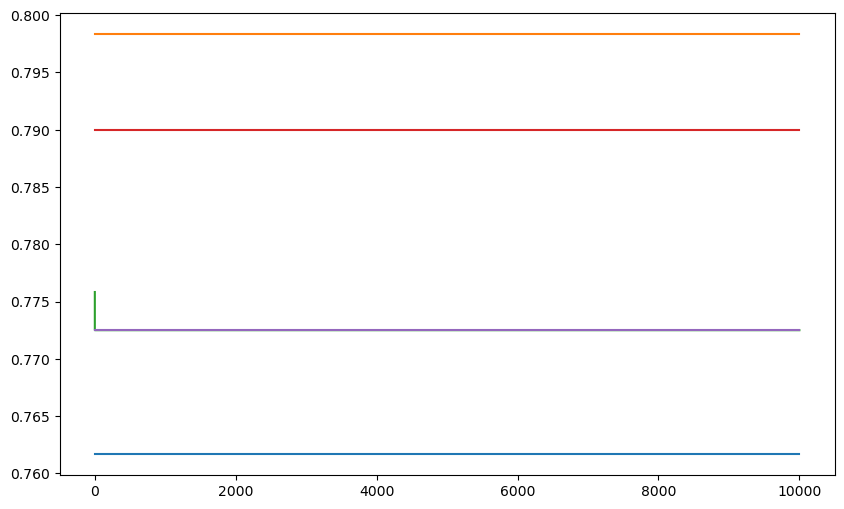

In [26]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Function to perform penalty test and calculate metric values
def perform_penalty_test(X_train, y_train, X_test, y_test, penalty_values):
    # Initialize lists to store metric values for each model
    accuracy_values = []
    precision_values = []
    recall_values = []
    f1_values = []
    roc_auc_values = []

    # Calculate metrics for each model
    for penalty in penalty_values:
        # Initialize Logistic Regression model with current penalty value
        logistic_regression = LogisticRegression(penalty='l2', C=penalty, solver='liblinear')
        
        # Fit the model on the training data
        logistic_regression.fit(X_train, y_train)
        
        # Predict on the test data
        y_pred = logistic_regression.predict(X_test)
        
        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred)
        
        # Append metric values to lists
        accuracy_values.append(accuracy)
        precision_values.append(precision)
        recall_values.append(recall)
        f1_values.append(f1)
        roc_auc_values.append(roc_auc)

    return accuracy_values, precision_values, recall_values, f1_values, roc_auc_values

# Function to visualize the performance of different models
def visualize_performance(penalty_values, metric_values, metric_name):
    plt.figure(figsize=(10, 6))
    for i, penalty in enumerate(penalty_values):
        plt.plot(penalty_values, metric_values[i], label=f'Penalty {penalty}')
    plt.xlabel('Penalty Value (C)')
    plt.ylabel(metric_name)
    plt.title(f'{metric_name} vs. Penalty Value')
    plt.xscale('log')
    plt.legend()
    plt.show()

# Resample the original dataset into five samples
num_samples = 5
sample_size = int(0.2 * len(X))  # 20% of original size
samples = [X.sample(sample_size, replace=False) for _ in range(num_samples)]

# Initialize lists to store metric values for each sample
accuracy_values_samples = []
precision_values_samples = []
recall_values_samples = []
f1_values_samples = []
roc_auc_values_samples = []

# Define penalty values
penalty_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]

# Perform penalty test for each sample
for sample in samples:
    X_train, X_test, y_train, y_test = train_test_split(sample, y[sample.index], test_size=0.2, random_state=42)
    accuracy_values, precision_values, recall_values, f1_values, roc_auc_values = perform_penalty_test(X_train, y_train, X_test, y_test, penalty_values)
    accuracy_values_samples.append(accuracy_values)
    precision_values_samples.append(precision_values)
    recall_values_samples.append(recall_values)
    f1_values_samples.append(f1_values)
    roc_auc_values_samples.append(roc_auc_values)

# Print metric values for each sample
for i, (accuracy_values, precision_values, recall_values, f1_values, roc_auc_values) in enumerate(zip(accuracy_values_samples, precision_values_samples, recall_values_samples, f1_values_samples, roc_auc_values_samples)):
    print(f"\nSample {i+1} Metrics:")
    print("Penalty Value\tAccuracy\tPrecision\tRecall\t\tF1 Score\tROC AUC")
    for j, penalty in enumerate(penalty_values):
        print(f"{penalty}\t\t{accuracy_values[j]:.4f}\t\t{precision_values[j]:.4f}\t\t{recall_values[j]:.4f}\t\t{f1_values[j]:.4f}\t\t{roc_auc_values[j]:.4f}")

# Visualize the performance of different models
visualize_performance(penalty_values, accuracy_values_samples, 'Accuracy')
visualize_performance(penalty_values, precision_values_samples, 'Precision')
visualize_performance(penalty_values, recall_values_samples, 'Recall')
visualize_performance(penalty_values, f1_values_samples, 'F1 Score')
visualize_performance(penalty_values, roc_auc_values_samples, 'ROC AUC')


Cross validation check

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Initialize logistic regression model
logistic_regression = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')

# Perform cross-validation
cv_scores = cross_val_score(logistic_regression, X, y, cv=5, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))


Cross-Validation Scores: [0.779      0.77883333 0.77883333 0.77883333 0.77883333]
Mean CV Score: 0.7788666666666668


visualize cross validation

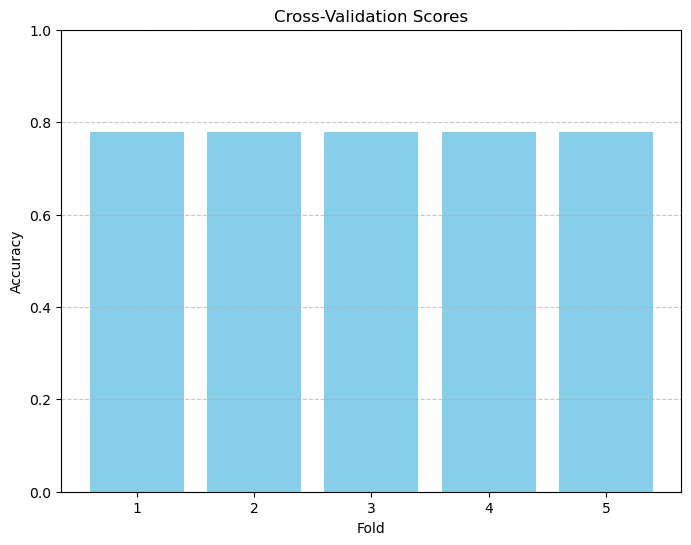

Mean CV Score: 0.7788666666666668


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Initialize logistic regression model
logistic_regression = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')

# Perform cross-validation
cv_scores = cross_val_score(logistic_regression, X, y, cv=5, scoring='accuracy')

# Plot cross-validation scores
plt.figure(figsize=(8, 6))
plt.bar(np.arange(len(cv_scores)), cv_scores, color='skyblue')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Scores')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1 for accuracy
plt.xticks(np.arange(len(cv_scores)), np.arange(1, len(cv_scores) + 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Print mean cross-validation score
print("Mean CV Score:", np.mean(cv_scores))
